<a href="https://colab.research.google.com/github/pchunter97/clasificador_noticias/blob/mlp/MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
#Conectar al drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.preprocessing import label_binarize

In [9]:
data_preprocesed = np.load("/content/drive/MyDrive/FakesNews/dataset_preprocesado.npy")
data_cleaned = pd.read_csv("/content/drive/MyDrive/FakesNews/dataset_final.csv")


In [ ]:
data_cleaned.info()

In [10]:
y_train_ohe = label_binarize(data_cleaned['clase'], classes=[0,1])

In [11]:
x_train,x_test,y_train, y_test = train_test_split(data_preprocesed,y_train_ohe,test_size=0.2,random_state=100)

In [ ]:
print("X_train info",x_train.shape)
print("\n\n\nX_test info",x_test.shape)
print("\n\n\nY_train info",y_train.shape)
print("\n\n\nY_test info",y_test.shape)

#Implementación del modelo

In [12]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, LeakyReLU

In [25]:
from keras.engine.input_layer import Input
input_dim = x_train[1].shape
model = Sequential()
model.add(Dense(512, input_shape=input_dim))
model.add(LeakyReLU(0.5))

model.add(Dropout(0.2))
model.add(Dense(256))
model.add(LeakyReLU(0.2))

model.add(Dropout(0.2))
model.add(Dense(128))
model.add(LeakyReLU(0.2))

model.add(Dropout(0.2))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics='accuracy')
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 512)               154112    
                                                                 
 leaky_re_lu_12 (LeakyReLU)  (None, 512)               0         
                                                                 
 dropout_7 (Dropout)         (None, 512)               0         
                                                                 
 dense_20 (Dense)            (None, 256)               131328    
                                                                 
 leaky_re_lu_13 (LeakyReLU)  (None, 256)               0         
                                                                 
 dropout_8 (Dropout)         (None, 256)               0         
                                                                 
 dense_21 (Dense)            (None, 128)              

In [26]:
history = model.fit(x_train, y_train, epochs=10,verbose=True,validation_data=(x_test,y_test),batch_size=32)

Epoch 1/10
233/233 [==============================] - 3s 10ms/step - loss: 0.5823 - accuracy: 0.7009 - val_loss: 0.5369 - val_accuracy: 0.7413
Epoch 2/10
233/233 [==============================] - 2s 8ms/step - loss: 0.5268 - accuracy: 0.7500 - val_loss: 0.5857 - val_accuracy: 0.6869
Epoch 3/10
233/233 [==============================] - 2s 9ms/step - loss: 0.4975 - accuracy: 0.7622 - val_loss: 0.5224 - val_accuracy: 0.7509
Epoch 4/10
233/233 [==============================] - 2s 8ms/step - loss: 0.4670 - accuracy: 0.7775 - val_loss: 0.5115 - val_accuracy: 0.7472
Epoch 5/10
233/233 [==============================] - 2s 8ms/step - loss: 0.4690 - accuracy: 0.7775 - val_loss: 0.5023 - val_accuracy: 0.7547
Epoch 6/10
233/233 [==============================] - 2s 8ms/step - loss: 0.4480 - accuracy: 0.7887 - val_loss: 0.4770 - val_accuracy: 0.7800
Epoch 7/10
233/233 [==============================] - 2s 8ms/step - loss: 0.4392 - accuracy: 0.7919 - val_loss: 0.4811 - val_accuracy: 0.7795
Epoch

#Predict

Training Accuracy: 0.8145
Testing Accuracy:  0.7859


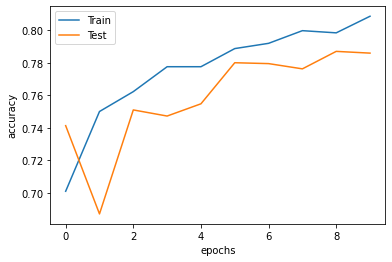

In [27]:
loss, accuracy = model.evaluate(x_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(x_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['Train','Test'])
plt.show()

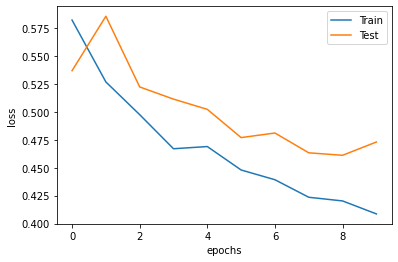

In [33]:
#Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['Train','Test'])
plt.show()

In [28]:
#Guardar modelo
model.save("/content/drive/MyDrive/FakesNews/MLP_v2.h5")